In [48]:
import math
import cmath
import matplotlib.pyplot as plt

In [49]:
# Номер бригады
Nb = 21

# Длина последовательности
N = 30 + (Nb % 5)

# Основание экспоненты
a = ((-1) ** Nb) * (0.8 + 0.005 * (Nb % 20))

# Амплитуда гармонического сигнала
C = 1 + (Nb % 5)

# Частота гармонического сигнала
w0 = math.pi / (6 + (Nb % 5))

# Амплитуда импульса
U = Nb

# Начальный момент импульса
n0 = 3 + (Nb % 5)

# Длина импульса
n_imp = 5 + (Nb % 5)

# Амплитуды гармонических сигналов
B1 = 1.5 + (Nb % 5)
B2 = 5.7 - (Nb % 5)
B3 = 2.2 + (Nb % 5)

# Частоты гармонических сигналов
w1 = math.pi / (4 + (Nb % 5))
w2 = math.pi / (8 + (Nb % 5))
w3 = math.pi / (16 + (Nb % 5))

# Коэффициенты линейной комбинации гармонических сигналов
a1 = 1.5 - (Nb % 5)
a2 = 0.7 + (Nb % 5)
a3 = 1.4 + (Nb % 5)

# Период последовательности s4
T = 2 * n_imp

In [50]:
# Точки интервала дискретного нормированного времени
Xn = [i for i in range(N)]

# Точки [0; 5N - 1]
Xn5 = [i for i in range(N * 5)]

# Точки 5-ти периодов последовательности s4
Xs4 = [i for i in range(T * 5)]

In [61]:
# Дискретный единичный скачок
def sigma_d(k):
  return int(k >= 0)

# Дискретный прямоугольный импульс
def s1(k):
  return U * (sigma_d(k - n0) - sigma_d(k - (n0 + n_imp)))

# Гармонические сигналы
def x1(k):
  return B1 * math.sin(w1*k)
def x2(k):
  return B2 * math.sin(w2*k)
def x3(k):
  return B3 * math.sin(w3*k)

# Линейная комбинация дискретных гармонических сигналов
def s2(k):
  return a1 * x1(k) + a2 * x2(k) + a3 * x3(k)

# Дискретный гармонический сигнал s3 с экспоненциальной огибающей
def s3(k):
  return C * math.cos(w0 * k) * s3_wrap(k)

# Экспоненциальая огибающая
def s3_wrap(k):
  return abs(a) ** k

# Периодическая последовательность s4
def s4(k):
  return s1(k % T)

In [62]:
# Значения сигналов
s1_Y = [s1(k) for k in Xn]

x1_Y = [x1(k) for k in Xn5]
x2_Y = [x2(k) for k in Xn5]
x3_Y = [x3(k) for k in Xn5]

s2_Y = [s2(k) for k in Xn5]

s3_Y = [s3(k) for k in Xn]
s3_wrap_Y = [s3_wrap(k) for k in Xn]

s4_Y = [s4(k) for k in Xs4]

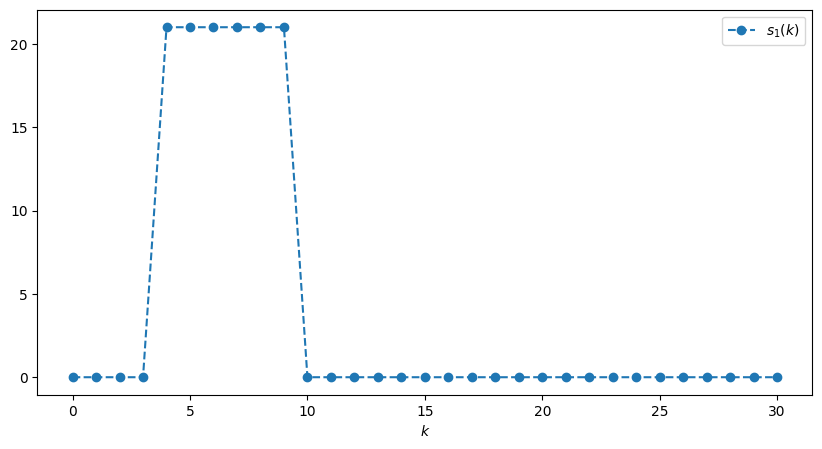

In [53]:
# График дискретного прямоугольного импульса
plt.figure(figsize=(10,5))
plt.plot(Xn, s1_Y, 'o--', label='$s_1(k)$')

plt.xlabel('$k$')
plt.legend()
!

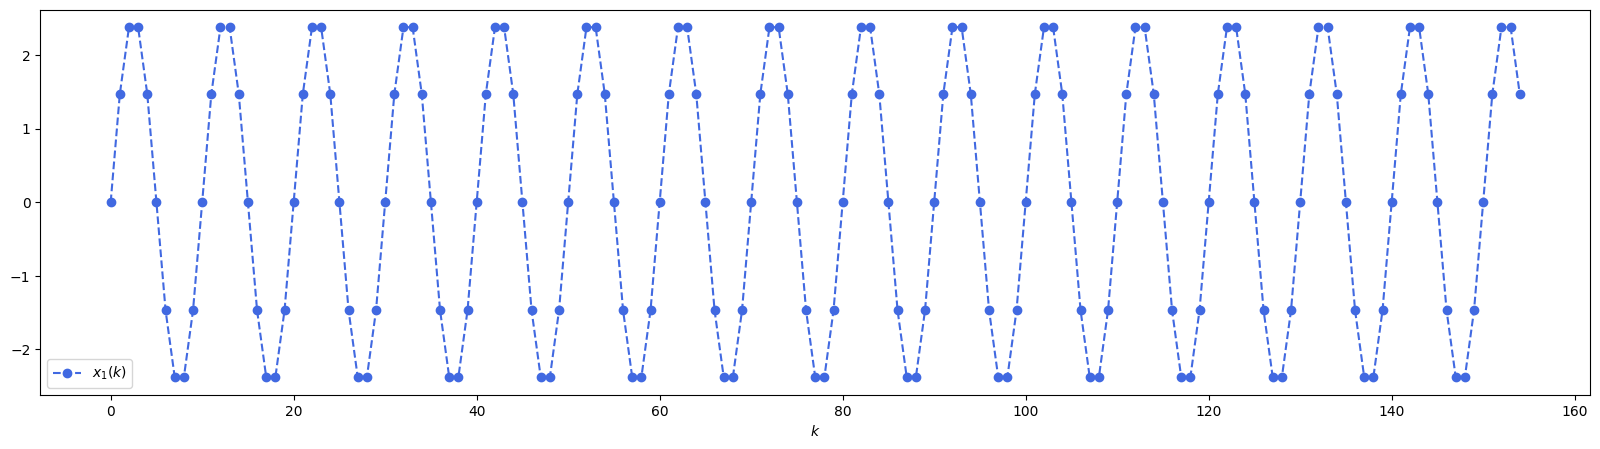

In [54]:
# График 1-го гармонического сигнала
plt.figure(figsize=(20,5))
plt.plot(Xn5, x1_Y, 'o--', color='royalblue', label='$x_1(k)$')

plt.xlabel('$k$')
plt.legend()
!

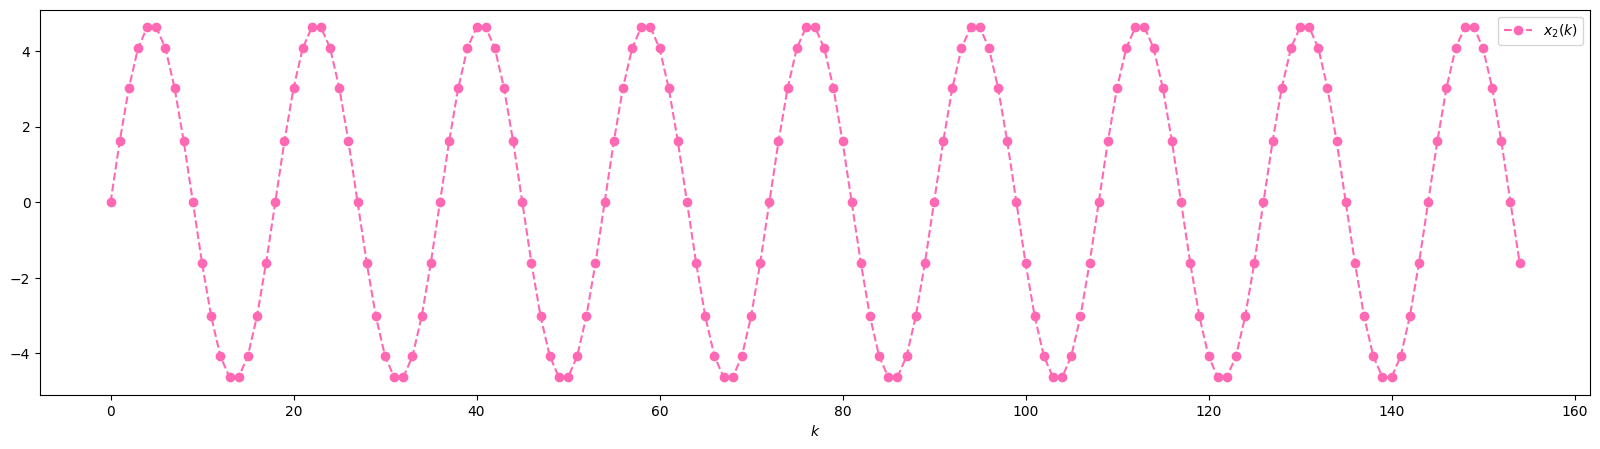

In [55]:
# График 2-го гармонического сигнала
plt.figure(figsize=(20,5))
plt.plot(Xn5, x2_Y, 'o--', color='hotpink', label='$x_2(k)$')

plt.xlabel('$k$')
plt.legend()
!

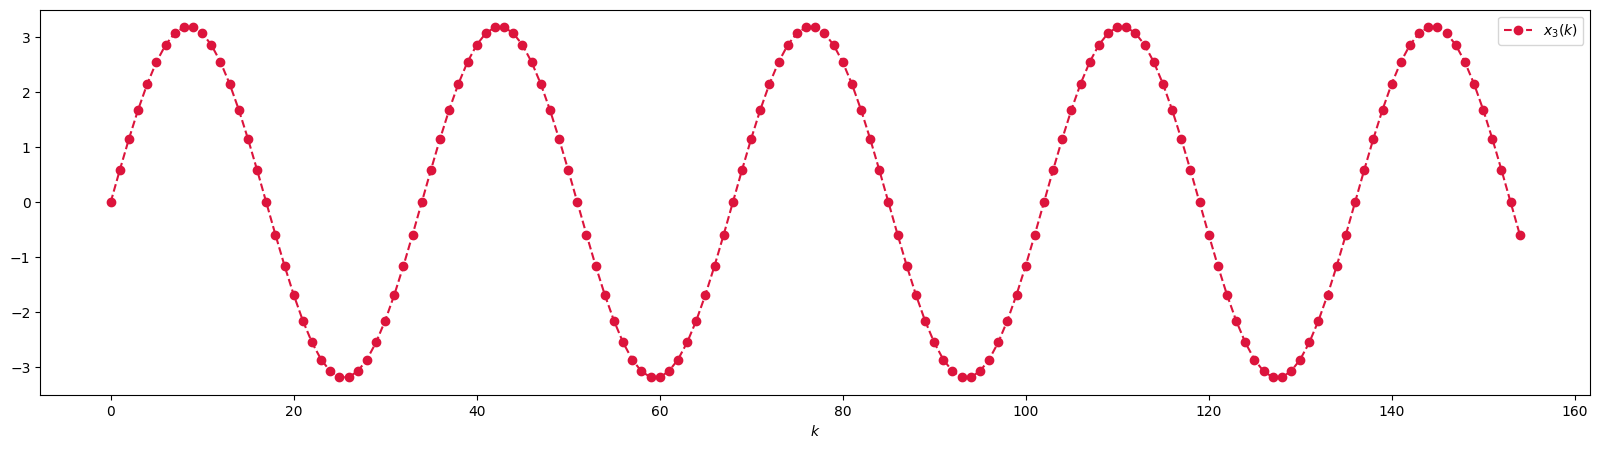

In [56]:
# График 3-го гармонического сигнала
plt.figure(figsize=(20,5))
plt.plot(Xn5, x3_Y, 'o--', color='crimson', label='$x_3(k)$')

plt.xlabel('$k$')
plt.legend()
!

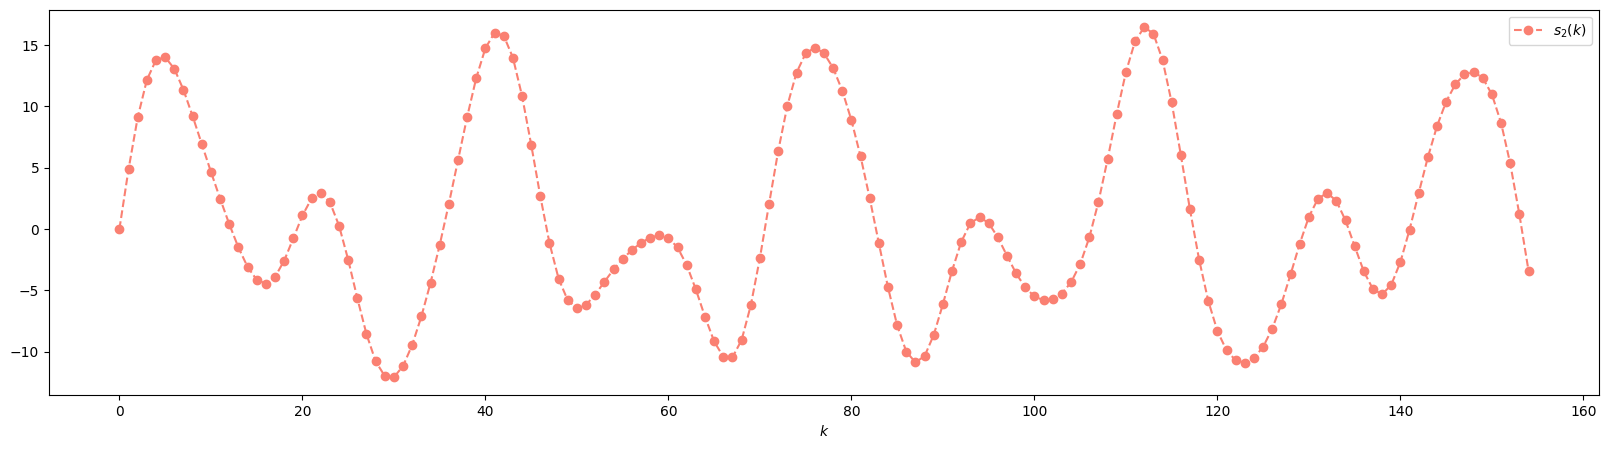

In [57]:
# График 3-го гармонического сигнала
plt.figure(figsize=(20,5))
plt.plot(Xn5, s2_Y, 'o--', color='salmon', label='$s_2(k)$')

plt.xlabel('$k$')
plt.legend()
!

In [58]:
# Среднее значение
mean_s2 = sum(s2_Y) / len(s2_Y)

# Энергия
E = sum([s ** 2 for s in s2_Y])

# Средняя мощность
P = E / len(s2_Y)

print(f'mean_s2 = {mean_s2} , E = {E} , P = {P}')

mean_s2 = 0.825142633586971 , E = 9493.592607246532 , P = 61.24898456288085


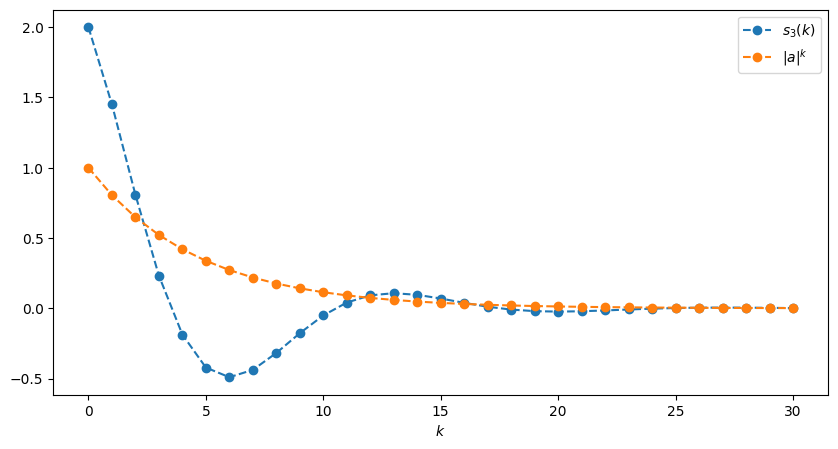

In [63]:
# График гармонического сигнала с экспоненциальной огибающей
plt.figure(figsize=(10,5))
plt.plot(Xn, s3_Y, 'o--', label='$s_3(k)$')
plt.plot(Xn, s3_wrap_Y, 'o--', label='$|a|^k$')

plt.xlabel('$k$')
plt.legend()
!

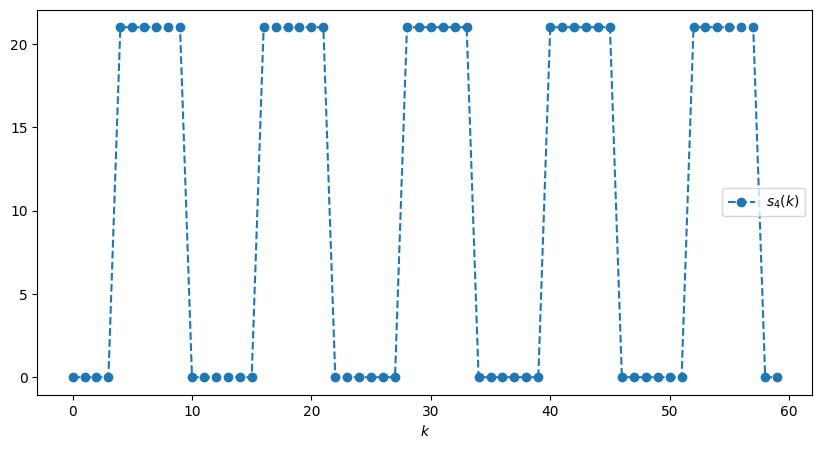

In [60]:
# График прямоугольного дискретного импульса на 5-ти периодах
plt.figure(figsize=(10,5))
plt.plot(Xs4, s4_Y, 'o--', label='$s_4(k)$')

plt.xlabel('$k$')
plt.legend()
!